# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

# Data loading

In [2]:
df = pd.read_csv('database.csv', sep=';', index_col=0, header=0)

In [3]:
df.head()

,Primaries,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Secondaries,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Tertiaries,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Tailfeathers,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
Species,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN
Anser anser,5,3,biały,biały,biały,5,2,czarnobrązowy z szarym nalotem,czarnobrązowy z szarą nasadą,brązowoszary,330,220,4,3,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą,czarnobrązowy z szarą nasadą,brązowoszary,220,200,4,1,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą i białożółtą kraw...,czarnobrązowy z szarą nasadą,brązowoszary,220,150,4,2,biały,biały,biały,4,2,szarobrązowy z białym wierzchołkiem,biały z szarą nasadą,jasnoszary,170,140
Tadorna tadorna (adult),5,3,biały,czarny,białoczarny,5,2,czarny,czarny,szaroczarny,270,160,4,3,biały,białoczarny,białoczarny,4,2,czarne z białą nasadą i zieolonym połyskiem,czarnobiałe,szarobiały,170,150,4,1,biały,biały,biały,4,2,biały / czarny / ceglasty,biały,biały / szary,180,100,4,2,biały,biały,biały,4,2,biały z czarnym wąskim wierzchołkiem,biały z czarnym wąskim wierzchołkiem,biały,140,120
Tadorna tadorna (young),5,3,biały,czarnobrązowy,białoczarnobrązowy,5,2,czarnoszare z białawą nasadą / + z białym wier...,czarnoszare z białawą nasadą / + z białym wier...,szaroczarne z białawą nasadą / + z białym wier...,270,160,4,3,biały,biały i czarnobrązowy,biały i czarnobrązowy,4,2,czarnoszare z białym wierzchołkiem,czanoszare z białą nasadą i białym wierzchołkiem,biały / szary,170,150,4,1,biały,szarobrązow / biały,szarobrązow / biały,4,2,biały / brązowoszary z płową krawędzią,biały / szarobrązowy,biały / jasnoszary,180,100,4,2,biały,biały,biały,4,2,biały z ciemnobrązowym wierzchołkiem,biały z ciemnobrązowym wierzchołkiem,biały,140,120
Anas platyrhynchos,5,3,biały,szarobrązowy,szarobrązowy,5,2,szarobrązowe,szarobrązowe z szarą nasadą,szarobrązowy,220,130,4,3,biały,szarobrązowy,szarobrązowy,4,2,czarne z niebieskim połyskiem i białym wierzch...,szarobrązowe,szarobrązowe,140,120,4,1,biały,brązowy,szary,3,3,szare / jasnoszare,szare / jasnoszare,jasnoszary,170,70,4,3,biały,jasnoszary / szary,jasnoszary,3,2,szarobiały / szarobiały z mozaiką,szarobiały / szarobiały z mozaiką,biały / jasnoszary,120,90


### Build 2-level column index

In [4]:
c1 = [x for x in df.columns if 'Unnamed' not in x]
c1

['Primaries', 'Secondaries', 'Tertiaries', 'Tailfeathers']

In [5]:
len(df.columns) / len(c1)

12.0

In [6]:
c2 = df.iloc[0,:12].values
c2

array(['M', 'D', 'Colour of calamus', 'Colour of rachis (upper)',
       'Colour of rachis (under)', 'T', 'S', 'Colour of outer vane',
       'Colour of inner vane', 'Colour of upper vanes', 'MAX', 'MIN'],
      dtype=object)

In [7]:
mi = np.stack(np.meshgrid(c1, c2)).T.reshape(-1,2)
mi.shape

(48, 2)

In [8]:
mi = pd.MultiIndex.from_arrays(mi.T)

In [9]:
df = pd.DataFrame(df.iloc[1:].values, index=df.iloc[1:].index, columns=mi)

In [10]:
df.head()

Primaries                       \
                                M  D Colour of calamus   
Anser anser                     5  3             biały   
Tadorna tadorna (adult)         5  3             biały   
Tadorna tadorna (young)         5  3             biały   
Anas platyrhynchos              5  3             biały   
Anas crecca                     4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  5   
Tadorna tadorna (adult)                   czarny              białoczarny  5   
Tadorna tadorna (young)            czarnobrązowy       białoczarnobrązowy  5   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  5   
Anas crecca                                szary                    szary  4   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                     czarnobrązowy z szarym nalotem   
Tadorna tadorna (adult)  2                                             czarny   
Tadorna tadorna (young)  2  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos       2                                       szarobrązowe   
Anas crecca              2                                        ciemnoszary   

                                                                            \
                                                      Colour of inner vane   
Anser anser                                   czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)                                             czarny   
Tadorna tadorna (young)  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos                             szarobrązowe z szarą nasadą   
Anas crecca                             szary z ciemnoszarym wierzchołkiem   

                                                                            \
                                                     Colour of upper vanes   
Anser anser                                                   brązowoszary   
Tadorna tadorna (adult)                                        szaroczarny   
Tadorna tadorna (young)  szaroczarne z białawą nasadą / + z białym wier...   
Anas platyrhynchos                                            szarobrązowy   
Anas crecca                                                          szary   

                                  Secondaries                       \
                         MAX  MIN           M  D Colour of calamus   
Anser anser              330  220           4  3             biały   
Tadorna tadorna (adult)  270  160           4  3             biały   
Tadorna tadorna (young)  270  160           4  3             biały   
Anas platyrhynchos       220  130           4  3             biały   
Anas crecca              160   90           4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  4   
Tadorna tadorna (adult)              białoczarny              białoczarny  4   
Tadorna tadorna (young)    biały i czarnobrązowy    biały i czarnobrązowy  4   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  4   
Anas crecca                                szary                    szary  3   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                       czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)  2        czarne z białą nasadą i zieolonym połyskiem   
Tadorna tadorna (y

# Find NaN

In [11]:
df.isna().sum(axis=1).values

array([ 0,  0,  0,  0,  0, 12,  0,  1,  0,  0,  0,  0,  0,  0,  0, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 14, 14,  0,  0,  0,  0,  0,
        0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 48, 48,
       48, 48,  8,  8,  8, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48])

In [12]:
nan = df.isna().sum(axis=1).values > 0

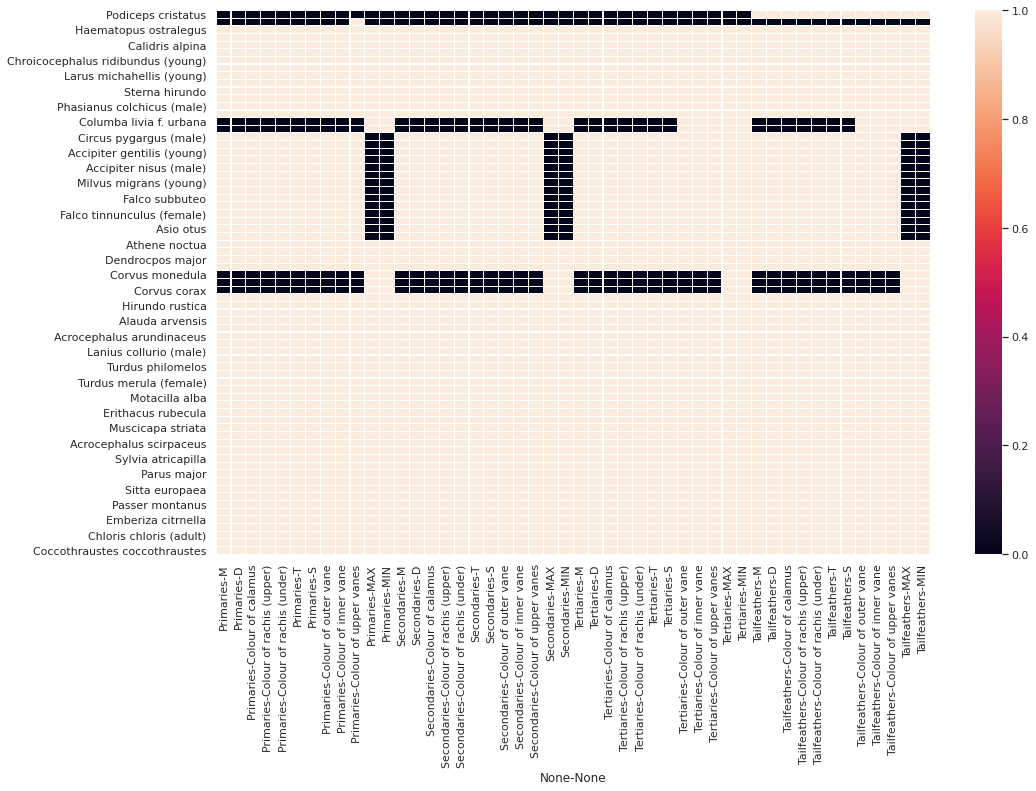

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df[nan].isna(), linewidths=0.1)

# Get sets of unique values

In [14]:
values = {x:df.loc[:,x].unique() for x in df.columns}

In [15]:
flat = {x:set() for x in set([k[1] for k in values])}
for k in values:
    flat[k[1]] = flat[k[1]].union(values[k])

In [16]:
values = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)
values

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"{nan, żółtobrązowy, szara / ciemnoszara, szaro...","{nan, ciemnoszare, szary z ciemnoszarym wierzc...","{nan, brązowe, czasem z ciemniejszymi prążkami...","{nan, czanoszary, biały, szary i czarny, czarn...","{nan, biały i szaroczarny, czarna, biała do br...","{nan, szaroczarny, czarne, szary, biały / jasn...","{nan, 1, 2, 3}","{nan, 2, 3, 4, 5}","{nan, 250, 230, 130, 500, 100, 160, 350, 190, ...","{nan, 170, 65, 250, 230, 130, 380, 80, 240, 10...","{1, nan, 2, 3}","{nan, 2, 3, 4, 5}"


# Translate

In [17]:
keys = set()
for s in values.values.ravel():
    keys = keys.union(s)
keys.remove(np.nan)

In [18]:
for k in sorted(keys):
    print(f'\'{k}\':,')

'1':,
'100':,
'110':,
'120':,
'130':,
'140':,
'150':,
'160':,
'170':,
'180':,
'190':,
'2':,
'200':,
'210':,
'220':,
'230':,
'240':,
'250':,
'260':,
'270':,
'280':,
'290':,
'3':,
'300':,
'310':,
'320':,
'330':,
'340':,
'350':,
'360':,
'370':,
'380':,
'390':,
'4':,
'400':,
'410':,
'420':,
'450':,
'490':,
'5':,
'50':,
'500':,
'560':,
'570':,
'60':,
'65':,
'70':,
'80':,
'90':,
'biała':,
'biała do brązowej':,
'biała i czarna':,
'biała i czarnobrązowa':,
'białe':,
'białe w dolnej połowie, czarne w górnej połowie':,
'białe z zarysem czarnobrązowego wierzchołka i prążków':,
'białe z zarysem prążków':,
'białe, a przy stosinie ciemnobrązowe':,
'białe, a przy stosinie ciemnobrązowe / białe, a przy stosinie ciemnobrązowe z jednym - czterema prostymi, ciemniejszymi pręgami':,
'białe, a przy stosinie ciemnobrązowe z dwoma - trzema prostymi, ciemniejszymi pręgami':,
'białe, a przy stosinie ciemnobrązowe z trzema - czterema prostymi, ciemniejszymi pręgami':,
'białe, brązowe przy stosinie i z brązowymi

In [19]:
translation = {
    'biała':'white',
    'biała do brązowej':'white brown',
    'biała i czarna':'white black',
    'biała i czarnobrązowa':'white black brown',
    'białe':'white',
    'białe w dolnej połowie, czarne w górnej połowie':'white black',
    'białe z zarysem czarnobrązowego wierzchołka i prążków':'white black brown stripes',
    'białe z zarysem prążków':'white stripes',
    'białe, a przy stosinie ciemnobrązowe':'white darkbrown',
    'białe, a przy stosinie ciemnobrązowe / białe, a przy stosinie ciemnobrązowe z jednym - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z dwoma - trzema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z trzema - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, brązowe przy stosinie i z brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown ~stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami':'white brown black stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown black ~stripes',
    'białei z brązowymi wierzchołkami i zarysem prążków':'white brown stripes',
    'białei z czarnobrązowymi wierzchołkami i zarysem prążków':'white black brown stripes',
    'białoczarnobrązowy':'white black brown',
    'białoczarny':'white black',
    'białoróżowe':'white pink',
    'białoszary':'white grey',
    'biały':'white',
    'biały / biały z szaroczarnym':'white grey black',
    'biały / brązowoszary z płową krawędzią':'white brown grey',
    'biały / czarny / ceglasty':'white black orange',
    'biały / jasnoszary':'white lightgrey',
    'biały / szarobrązowy':'white grey brown',
    'biały / szary':'white grey',
    'biały do jasnoszarego':'white lightgrey',
    'biały i czarnobrązowy':'white black brown',
    'biały i czarny':'white black',
    'biały i szaroczarny':'white grey black',
    'biały i szary':'white grey',
    'biały z ciemnobrązowym wierzchołkiem':'white darkbrown',
    'biały z czarnym wąskim wierzchołkiem':'white black',
    'biały z szarą nasadą':'white grey',
    'biały, szary i czarny':'white grey black',
    'brązowe do białych, z brązowymi prążkami':'brown white stripes',
    'brązowe do białych, z czarnobrązowym, szerokim wierzchołkiem i czasami z brązowymi prążkami':'brown white black brown ~stripes',
    'brązowe z czanobrązowymi wierzchołkami, czasem z ciemniejszymi prążkami':'brown black brown ~stripes',
    'brązowe, czasem z ciemniejszymi prążkami':'brown ~stripes',
    'brązowoszary':'brown grey',
    'brązowy':'brown',
    'ciemnobrązowe':'darkbrown',
    'ciemnoszare':'darkgrey',
    'ciemnoszare / ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszary':'darkgrey',
    'ciemnoszary z białą krawędzią':'darkgrey white',
    'czanoszare z białą nasadą i białym wierzchołkiem':'black grey white',
    'czanoszary':'black grey',
    'czarna':'black',
    'czarne':'black',
    'czarne / czarne z białą nasadą':'black white',
    'czarne z białym wierzchołkiem / + z zielonym połyskiem':'black white glossy',
    'czarne z białą nasadą i zieolonym połyskiem':'black white glossy',
    'czarne z niebieskim połyskiem i białym wierzchołkiem':'black white glossy',
    'czarnobiałe':'white black',
    'czarnobiały':'black white',
    'czarnobrązowa':'black brown',
    'czarnobrązowe':'black brown',
    'czarnobrązowe / czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown ~stripes',
    'czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown stripes',
    'czarnobrązowy':'black brown',
    'czarnobrązowy z szarym nalotem':'black brown grey',
    'czarnobrązowy z szarą nasadą':'black brown grey',
    'czarnobrązowy z szarą nasadą i białożółtą krawędzią':'black brown grey white yellow',
    'czarnobrązowy z zielonym i fioletowym połyskiem':'black brown glossy',
    'czarnobrązowy z zielonym połyskiem':'black brown glossy',
    'czarnoszara':'black grey',
    'czarnoszare':'black grey',
    'czarnoszare z białawą nasadą / + z białym wierzchołkiem':'black grey white',
    'czarnoszare z białym wierzchołkiem':'black grey white',
    'czarnoszary':'black grey',
    'czarnoszary z popielatym nalotem':'black grey',
    'czarny':'black',
    'czarny / czarnobrązowy':'black brown',
    'czarny / czarnobrązowy z małą białą nasadą':'black brown white',
    'czarny / czarnobrązowy, z jasnoszarą nasadą':'black brown lightgrey',
    'czarny / czarny z białym nalotem':'black white',
    'czarny / czarny z niebieskim połyskiem':'black glossy',
    'czarny z małą białą nasadą':'black white',
    'czarny z niebieskim połyskiem':'black glossy',
    'jasnoszara z ciemnoszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszare i ciemnoszare przy wierzchołku':'lightgrey darkgrey',
    'jasnoszare z ciemnioszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszary':'lightgrey',
    'jasnoszary / szary':'lightgrey grey',
    'jasnoszary u nasady, szary, ciemnoszary, czarny wierzchołek, pióro postrzępione':'lightgrey grey darkgrey black ragged',
    'jasnoszary z jasną nasadą':'lightgrey',
    'jasnoszary z jasną nasadą i białym wierzchołkiem':'lightgrey white',
    'szara':'grey',
    'szara / ciemnoszara':'grey darkgrey',
    'szara z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szare':'grey',
    'szare / jasnoszare':'grey lightgrey',
    'szarobiały':'grey white',
    'szarobiały / szarobiały z mozaiką':'lightgrey grey white',
    'szarobrązow / biały':'grey brown white',
    'szarobrązowe':'grey brown',
    'szarobrązowe z szarą nasadą':'grey brown',
    'szarobrązowy':'grey brown',
    'szarobrązowy z białym wierzchołkiem':'grey brown white',
    'szaroczarne':'grey black',
    'szaroczarne z białawą nasadą / + z białym wierzchołkiem':'grey black white',
    'szaroczarne z białymi nasadami':'grey black white',
    'szaroczarny':'grey black',
    'szarożółty':'grey yellow',
    'szary':'grey',
    'szary / ciemnoszary':'grey darkgrey',
    'szary i czarnoszary':'grey black',
    'szary z białą nasadą':'grey white',
    'szary z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szary z mozaiką na krawędzi / szary z czarnobiałą krawędzią':'grey black white',
    'szary, od górnej połowy czarny / czarnobrązowy':'grey black brown',
    'żółtobrązowy':'yellow brown',
    'żółtoszary':'yellow grey'
}

### Missing keys

In [20]:
for k in sorted(keys):
    if k not in translation:
        print(k)

1
100
110
120
130
140
150
160
170
180
190
2
200
210
220
230
240
250
260
270
280
290
3
300
310
320
330
340
350
360
370
380
390
4
400
410
420
450
490
5
50
500
560
570
60
65
70
80
90


### Create translated dataset

In [21]:
df_t = df.applymap(lambda x: translation[x] if x in translation else x)
df_t

Primaries                         \
                                      M    D Colour of calamus   
Anser anser                           5    3             white   
Tadorna tadorna (adult)               5    3             white   
Tadorna tadorna (young)               5    3             white   
Anas platyrhynchos                    5    3             white   
Anas crecca                           4    3             white   
...                                 ...  ...               ...   
Emberiza citrnella                  NaN  NaN               NaN   
Chloris chloris (young)             NaN  NaN               NaN   
Chloris chloris (adult)             NaN  NaN               NaN   
Carduelis carduelis                 NaN  NaN               NaN   
Coccothraustes coccothraustes       NaN  NaN               NaN   

                                                        \
                              Colour of rachis (upper)   
Anser anser                                      white   
Tadorna tadorna (adult)                          black   
Tadorna tadorna (young)                    black brown   
Anas platyrhynchos                          grey brown   
Anas crecca                                       grey   
...                                                ...   
Emberiza citrnella                                 NaN   
Chloris chloris (young)                            NaN   
Chloris chloris (adult)                            NaN   
Carduelis carduelis                                NaN   
Coccothraustes coccothraustes                      NaN   

                                                                  \
                              Colour of rachis (under)    T    S   
Anser anser                                      white    5    2   
Tadorna tadorna (adult)                    white black    5    2   
Tadorna tadorna (young)              white black brown    5    2   
Anas platyrhynchos                          grey brown    5    2   
Anas crecca                                       grey    4    2   
...                                                ...  ...  ...   
Emberiza citrnella                                 NaN  NaN  NaN   
Chloris chloris (young)                            NaN  NaN  NaN   
Chloris chloris (adult)                            NaN  NaN  NaN   
Carduelis carduelis                                NaN  NaN  NaN   
Coccothraustes coccothraustes                      NaN  NaN  NaN   

                                                                         \
                              Colour of outer vane Colour of inner vane   
Anser anser                       black brown grey     black brown grey   
Tadorna tadorna (adult)                      black                black   
Tadorna tadorna (young)           black grey white     black grey white   
Anas platyrhynchos                      grey brown           grey brown   
Anas crecca                               darkgrey        grey darkgrey   
...                                            ...                  ...   
Emberiza citrnella                             NaN                  NaN   
Chloris chloris (young)                        NaN                  NaN   
Chloris chloris (adult)                        NaN                  NaN   
Carduelis carduelis                            NaN                  NaN   
Coccothraustes coccothraustes                  NaN                  NaN   

                                                              Secondaries  \
                              Colour of upper vanes  MAX  MIN           M   
Anser anser                              brown grey  330  220           4   
Tadorna tadorna (adult)                  grey black  270  160           4   
Tadorna tadorna (young)            grey black white  270  160           4   
Anas platyrhynchos                       grey brown  220  130           4   
Anas crecca                                    grey  160   90           4   
...             

# Find similar

In [22]:
df_sorted = df_t.sort_values(list(df_t.columns)).dropna()
df_sorted

Primaries                       \
                                      M  D Colour of calamus   
Buteo buteo (young)                   3  2             white   
Buteo buteo (adult)                   3  2             white   
Ardea cinerea                         4  2             white   
Nycticorax nycticorax (adult)         4  2             white   
Nycticorax nycticorax (young)         4  2             white   
Egretta garzetta                      4  2             white   
Anas crecca                           4  3             white   
Phalacrocorax carbo                   4  3       yellow grey   
Aquila chrysaetos (adult)             5  2             white   
Ciconia ciconia                       5  2             white   
Aquila chrysaetos (young)             5  2             white   
Grus grus                             5  3     grey darkgrey   
Phoenicopterus roseus                 5  3       grey yellow   
Tadorna tadorna (adult)               5  3             white   
Tadorna tadorna (young)               5  3             white   
Anas platyrhynchos                    5  3             white   
Circaetus gallicus (adult)            5  3             white   
Circaetus gallicus (young)            5  3             white   
Anser anser                           5  3             white   

                                                        \
                              Colour of rachis (upper)   
Buteo buteo (young)                        white brown   
Buteo buteo (adult)                        white brown   
Ardea cinerea                               black grey   
Nycticorax nycticorax (adult)                lightgrey   
Nycticorax nycticorax (young)                lightgrey   
Egretta garzetta                                 white   
Anas crecca                                       grey   
Phalacrocorax carbo                              black   
Aquila chrysaetos (adult)                  black brown   
Ciconia ciconia                            white black   
Aquila chrysaetos (young)                  white black   
Grus grus                                        black   
Phoenicopterus roseus                            black   
Tadorna tadorna (adult)                          black   
Tadorna tadorna (young)                    black brown   
Anas platyrhynchos                          grey brown   
Circaetus gallicus (adult)                       white   
Circaetus gallicus (young)                       white   
Anser anser                                      white   

                                                              \
                              Colour of rachis (under)  T  S   
Buteo buteo (young)                              white  3  2   
Buteo buteo (adult)                              white  3  2   
Ardea cinerea                               black grey  3  2   
Nycticorax nycticorax (adult)                lightgrey  3  2   
Nycticorax nycticorax (young)                lightgrey  3  2   
Egretta garzetta                                 white  3  2   
Anas crecca                                       grey  4  2   
Phalacrocorax carbo                              black  4  2   
Aquila chrysaetos (adult)            white black brown  4  3   
Ciconia ciconia                            black white  5  1   
Aquila chrysaetos (young)                  white black  4  3   
Grus grus                                   black grey  5  2   
Phoenicopterus roseus                            black  5  2   
Tadorna tadorna (adult)                    white black  5  2   
Tadorna tadorna (young)              white black brown  5  2   
Anas platyrhynchos                          grey brown  5  2   
Circaetus gallicus (adult)                       white  4  3   
Circaetus gallicus (young)                       white  4  3   
Anser anser                                      white  5  2   

                                                           \
                                     Colour of outer vane   

In [23]:
sim = []
for i in range(1,len(df_sorted)):
    sim.append({
        'name':df_sorted.iloc[i-1].name+' - '+df_sorted.iloc[i].name,
        'v':df_sorted.iloc[i-1:i+1].apply(lambda x: (x.values == x[0]).sum()).sum() / 96
    })

In [24]:
pd.DataFrame(sim).set_index('name').sort_values(by='v', ascending=False)

,v
name,
Circaetus gallicus (adult) - Circaetus gallicus (young),0.958333
Buteo buteo (young) - Buteo buteo (adult),0.895833
Nycticorax nycticorax (adult) - Nycticorax nycticorax (young),0.875000
Tadorna tadorna (adult) - Tadorna tadorna (young),0.822917
Phoenicopterus roseus - Tadorna tadorna (adult),0.750000
Nycticorax nycticorax (young) - Egretta garzetta,0.750000
Ardea cinerea - Nycticorax nycticorax (adult),0.708333
Circaetus gallicus (young) - Anser anser,0.677083
Buteo buteo (adult) - Ardea cinerea,0.666667


In [25]:
df.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             biała   
Circaetus gallicus (young)         5  3             biała   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    biała                    biała   
Circaetus gallicus (young)                    biała                    biała   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3        czarnobrązowe   
Circaetus gallicus (young)  4  3        czarnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe / białe, ...   

                                                           Secondaries     \
                           Colour of upper vanes  MAX  MIN           M  D   
Circaetus gallicus (adult)                 białe  490  280           4  2   
Circaetus gallicus (young)                 białe  490  280           4  2   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  3  3   
Circaetus gallicus (young)                    biała  3  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z trzema ...   

                                                           Tertiaries     \
                           Colour of upper vanes  MAX  MIN          M  D   
Circaetus gallicus (adult)                 białe  320  250          3  1   
Circaetus gallicus (young)                 białe  320  250          3  1   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  2  3   
Circaetus gallicus (young)                    biała  2  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z dwoma -...   

                                                           Tailfeathers     \
                           Colour of upper vanes  MAX  MIN            M  D   
C

In [26]:
df_t.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             white   
Circaetus gallicus (young)         5  3             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3          black brown   
Circaetus gallicus (young)  4  3          black brown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Secondaries                       \
                            MAX  MIN           M  D Colour of calamus   
Circaetus gallicus (adult)  490  280           4  2             white   
Circaetus gallicus (young)  490  280           4  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  3  3            darkbrown   
Circaetus gallicus (young)  3  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tertiaries                       \
                            MAX  MIN          M  D Colour of calamus   
Circaetus gallicus (adult)  320  250          3  1             white   
Circaetus gallicus (young)  320  250          3  1             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  2  3            darkbrown   
Circaetus gallicus (young)  2  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tailfeathers                       \
                            MAX  MIN            M  D Colour of calamus   
Circaetus gallicus (adult)  250  200            3  2             white   
Circaetus gallicus (young)  250  200            3  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

     

# Obtain domains

In [27]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).min().min()

50.0

In [28]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).max().max()

570.0

In [29]:
text_cols = ['Colour of calamus',
             'Colour of inner vane',
             'Colour of outer vane',
             'Colour of rachis (under)',
             'Colour of rachis (upper)',
             'Colour of upper vanes']

In [30]:
values_t = {x:df_t.loc[:,x].unique().astype(str) for x in df_t.columns}

In [31]:
flat = {x:set() for x in set([k[1] for k in values_t])}
for k in values_t:
    if k[1] in text_cols:
        l = []
        for x in values_t[k]:
            l += x.split(' ')
        flat[k[1]] = flat[k[1]].union(l)
    else:
        flat[k[1]] = flat[k[1]].union(values_t[k])

In [32]:
values_t = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)

In [33]:
values_t = values_t.applymap(lambda x: sorted(x))
values_t

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"[brown, darkgrey, grey, lightgrey, nan, white,...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, grey, lightgrey, nan, white]","[black, brown, darkgrey, grey, lightgrey, nan,...","[black, brown, darkgrey, grey, lightgrey, nan,...","[1, 2, 3, nan]","[2, 3, 4, 5, nan]","[100, 110, 120, 130, 140, 150, 160, 170, 180, ...","[100, 110, 120, 130, 140, 150, 160, 170, 180, ...","[1, 2, 3, nan]","[2, 3, 4, 5, nan]"


In [34]:
values_t.to_csv('domains.csv', index=False)

# Visualize

In [35]:
df_num = df_t.loc[:,pd.IndexSlice[:,['M','D','T','S','MAX','MIN']]]
df_num = df_num.astype(np.float)

In [42]:
df_num = df_num.dropna(how='any')

In [70]:
df_num

Primaries                               \
                                      M    D    T    S    MAX    MIN   
Anser anser                         5.0  3.0  5.0  2.0  330.0  220.0   
Tadorna tadorna (adult)             5.0  3.0  5.0  2.0  270.0  160.0   
Tadorna tadorna (young)             5.0  3.0  5.0  2.0  270.0  160.0   
Anas platyrhynchos                  5.0  3.0  5.0  2.0  220.0  130.0   
Anas crecca                         4.0  3.0  4.0  2.0  160.0   90.0   
Phalacrocorax carbo                 4.0  3.0  4.0  2.0  250.0  180.0   
Plegadis falcinellus                4.0  2.0  4.0  2.0  240.0  160.0   
Phoenicopterus roseus               5.0  3.0  5.0  2.0  300.0  200.0   
Ciconia ciconia                     5.0  2.0  5.0  1.0  500.0  300.0   
Grus grus                           5.0  3.0  5.0  2.0  500.0  300.0   
Ardea cinerea                       4.0  2.0  3.0  2.0  390.0  270.0   
Nycticorax nycticorax (young)       4.0  2.0  3.0  2.0  220.0  160.0   
Nycticorax nycticorax (adult)       4.0  2.0  3.0  2.0  220.0  160.0   
Egretta garzetta                    4.0  2.0  3.0  2.0  220.0  170.0   
Aquila chrysaetos (adult)           5.0  2.0  4.0  3.0  560.0  370.0   
Aquila chrysaetos (young)           5.0  2.0  4.0  3.0  570.0  380.0   
Circaetus gallicus (young)          5.0  3.0  4.0  3.0  490.0  280.0   
Circaetus gallicus (adult)          5.0  3.0  4.0  3.0  490.0  280.0   
Buteo buteo (young)                 3.0  2.0  3.0  2.0  360.0  220.0   
Buteo buteo (adult)                 3.0  2.0  3.0  2.0  260.0  220.0   

                              Secondaries                               \
                                        M    D    T    S    MAX    MIN   
Anser anser                           4.0  3.0  4.0  2.0  220.0  200.0   
Tadorna tadorna (adult)               4.0  3.0  4.0  2.0  170.0  150.0   
Tadorna tadorna (young)               4.0  3.0  4.0  2.0  170.0  150.0   
Anas platyrhynchos                    4.0  3.0  4.0  2.0  140.0  120.0   
Anas crecca                           4.0  3.0  3.0  2.0   90.0   70.0   
Phalacrocorax carbo                   4.0  2.0  4.0  2.0  200.0  160.0   
Plegadis falcinellus                  4.0  2.0  3.0  2.0  160.0  150.0   
Phoenicopterus roseus                 4.0  3.0  4.0  2.0  200.0  170.0   
Ciconia ciconia                       4.0  2.0  4.0  2.0  320.0  290.0   
Grus grus                             4.0  2.0  4.0  3.0  360.0  300.0   
Ardea cinerea                         3.0  1.0  3.0  2.0  280.0  250.0   
Nycticorax nycticorax (young)         3.0  1.0  3.0  2.0  170.0  150.0   
Nycticorax nycticorax (adult)         3.0  1.0  3.0  2.0  170.0  150.0   
Egretta garzetta                      3.0  1.0  3.0  2.0  170.0  150.0   
Aquila chrysaetos (adult)             4.0  2.0  4.0  3.0  390.0  270.0   
Aquila chrysaetos (young)             4.0  2.0  4.0  3.0  400.0  280.0   
Circaetus gallicus (young)            4.0  2.0  3.0  3.0  320.0  250.0   
Circaetus gallicus (adult)            4.0  2.0  3.0  3.0  320.0  250.0   
Buteo buteo (young)                   3.0  2.0  3.0  2.0  250.0  160.0   
Buteo buteo (adult)                   3.0  2.0  3.0  2.0  250.0  160.0   

                              Tertiaries                               \
                                       M    D    T    S    MAX    MIN   
Anser anser                          4.0  1.0  4.0  2.0  220.0  150.0   
Tadorna tadorna (adult)              4.0  1.0  4.0  2.0  180.0  100.0   
Tadorna tadorna (young)              4.0  1.0  4.0  2.0  180.0  100.0   
Anas platyrhynchos                   4.0  1.0  3.0  3.0  170.0   70.0   
Anas crecca                          3.0  1.0  3.0  2.0  120.0   50.0   
Phalacrocorax carbo                  3.0  1.0  3.0  2.0  160.0   80.0   
Plegadis falcinellus                 3.0  1.0  3.0  2.0  170.0   90.0   
Phoenicopterus roseus                4.0  1.0  3.0  2.0  210.0  110.0   
Ciconia ciconia                      4.0  1.0  3.0  2.0  350.0  180.0   
Grus grus    

### By feather type

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(df_num)

In [76]:
arr = np.zeros((arr_scaled.shape[0], 8))
for i in range(0,4):
    pca = PCA(2)
    arr[:,i*2:(i+1)*2] = pca.fit_transform(arr_scaled[:,i*6:(i+1)*6])

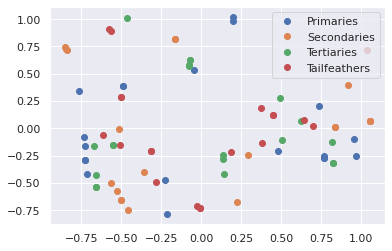

In [82]:
lbls = {0:'Primaries', 2:'Secondaries', 4:'Tertiaries', 6:'Tailfeathers'}
for i in range(0,8,2):
    plt.plot(arr[:,i], arr[:,i+1], 'o', label=lbls[i])
plt.legend()

### By species

In [83]:
pca = PCA(2)
arr = pca.fit_transform(arr_scaled)

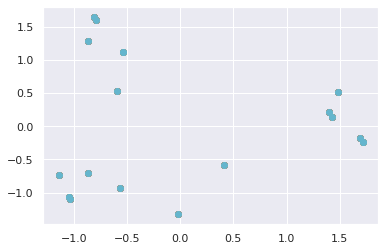

In [86]:
for i in range(0,len(arr)):
    plt.plot(arr[:,0], arr[:,1], 'o')#, label=df_num.index[i])
#plt.legend()